<a href="https://colab.research.google.com/github/Anya-Gupta-05/Music_Genre_Classification_using-CNN-and-LSTM/blob/main/Music_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🎶 **CNN-Based Music Genre Classification**


---




📌 Overview
---
This project focuses on classifying music genres using a Convolutional Neural Network (CNN) trained on spectrogram images of audio tracks. By transforming audio signals into visual representations, we enable the CNN to detect patterns that correspond to different music genres.

🎯 Objective
--
To build and train a deep learning model that can predict the genre of a song from its spectrogram image. The model learns to extract and recognize visual patterns unique to genres such as jazz, rock, classical, and more.


---


**🛠️ Technologies Used**
Python

TensorFlow / Keras

Librosa (for audio processing)

OpenCV / Matplotlib (for spectrograms)


---





In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import librosa
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset="/content/drive/MyDrive/Data.zip (Unzipped Files)/images_original"
img_size=128
batch_size=32

In [ ]:
import os

dataset_path = "/content/drive/MyDrive/images_original"  # Update this path if needed

if os.path.exists(dataset_path):
    print("✅ Dataset path exists!")
    print("Folders inside:", os.listdir(dataset_path))
else:
    print("❌ Dataset path does NOT exist. Check the path.")

for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):  # Ensure it's a directory
        print(f"{class_name}: {len(os.listdir(class_folder))} images")



✅ Dataset path exists!
Folders inside: ['hiphop', 'pop', 'metal', 'blues', 'jazz', 'classical', 'reggae', 'disco', 'rock', 'country']
hiphop: 100 images
pop: 120 images
metal: 100 images
blues: 100 images
jazz: 99 images
classical: 100 images
reggae: 100 images
disco: 100 images
rock: 100 images
country: 100 images


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path where all class folders are stored (UPDATE this path if needed)
dataset_path = "/content/drive/MyDrive/images_original"

# Define new directories for splits
train_path = "data/train"
val_path = "data/val"
test_path = "data/test"

# Create train, val, test folders if they don't exist
for path in [train_path, val_path, test_path]:
    os.makedirs(path, exist_ok=True)

# Get all class names (subfolders inside dataset_path)
class_names = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Loop through each class and split data
for class_name in class_names:
    class_folder = os.path.join(dataset_path, class_name)
    all_images = [f for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]  # Only take image files

    if len(all_images) == 0:
        print(f"⚠ Warning: No images found in {class_name}. Skipping...")
        continue  # Skip empty folders

    # Split into train (80%) and temp (20%)
    train_files, temp_files = train_test_split(all_images, test_size=0.2, random_state=42, shuffle=True)

    # Split temp into validation (10%) and test (10%)
    val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42, shuffle=True)

    # Function to move images while keeping the class structure
    def move_files(file_list, source_folder, dest_folder):
        os.makedirs(dest_folder, exist_ok=True)  # Ensure class folder exists
        for file in file_list:
            src = os.path.join(source_folder, file)
            dst = os.path.join(dest_folder, file)
            shutil.copy(src, dst)  # Copy instead of move (optional)

    # Move files to respective folders
    move_files(train_files, class_folder, os.path.join(train_path, class_name))
    move_files(val_files, class_folder, os.path.join(val_path, class_name))
    move_files(test_files, class_folder, os.path.join(test_path, class_name))

    # Print split info
    print(f"✅ {class_name}: {len(train_files)} train, {len(val_files)} val, {len(test_files)} test")

print("\n🎉 Dataset successfully split!")


✅ hiphop: 80 train, 10 val, 10 test
✅ pop: 96 train, 12 val, 12 test
✅ metal: 80 train, 10 val, 10 test
✅ blues: 80 train, 10 val, 10 test
✅ jazz: 79 train, 10 val, 10 test
✅ classical: 80 train, 10 val, 10 test
✅ reggae: 80 train, 10 val, 10 test
✅ disco: 80 train, 10 val, 10 test
✅ rock: 80 train, 10 val, 10 test
✅ country: 80 train, 10 val, 10 test

🎉 Dataset successfully split!


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 128  # Image size
batch_size = 32  # Batch size

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'data/train', target_size=(img_size, img_size), batch_size=batch_size, class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    'data/val', target_size=(img_size, img_size), batch_size=batch_size, class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'data/test', target_size=(img_size, img_size), batch_size=batch_size, class_mode='categorical', shuffle=False
)


Found 815 images belonging to 10 classes.
Found 102 images belonging to 10 classes.
Found 102 images belonging to 10 classes.


In [ ]:
print(train_generator.image_shape, test_generator.image_shape)


(128, 128, 3) (128, 128, 3)


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D
# Build CNN model
cnn_model = Sequential([
    # First Conv Block
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    # Second Conv Block
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    # Third Conv Block
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    # Add an extra Conv block
    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    # Fully Connected Layer
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Reduces overfitting
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer (10 genres)

])

# Compile Model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Print Model Summary
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 490,314 (1.87 MB)

 Trainable params: 489,354 (1.87 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# Train the CNN model
history = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    verbose=1
)


Epoch 1/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.9078 - loss: 0.2968 - val_accuracy: 0.3431 - val_loss: 5.4503
Epoch 2/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.8819 - loss: 0.3407 - val_accuracy: 0.5588 - val_loss: 2.2439
Epoch 3/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.8446 - loss: 0.3937 - val_accuracy: 0.5000 - val_loss: 2.4349
Epoch 4/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9033 - loss: 0.2726 - val_accuracy: 0.4706 - val_loss: 2.7608
Epoch 5/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.8907 - loss: 0.3297 - val_accuracy: 0.5098 - val_loss: 2.8981
Epoch 6/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.9082 - loss: 0.2616 - val_accuracy: 0.5294 - val_loss: 2.0240
Epoch 7/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.9036 - loss: 0.2822 - val_accuracy: 0.6373 - val_loss: 1.4146
Epoch 8/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.8976 - loss: 0.3414 - val_accuracy: 0.

In [ ]:
# Save Model with .keras extension
cnn_model.save('cnn_model.keras')

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc = cnn_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6085 - loss: 1.7969 
Test Accuracy: 61.76%
Test Loss: 1.7950


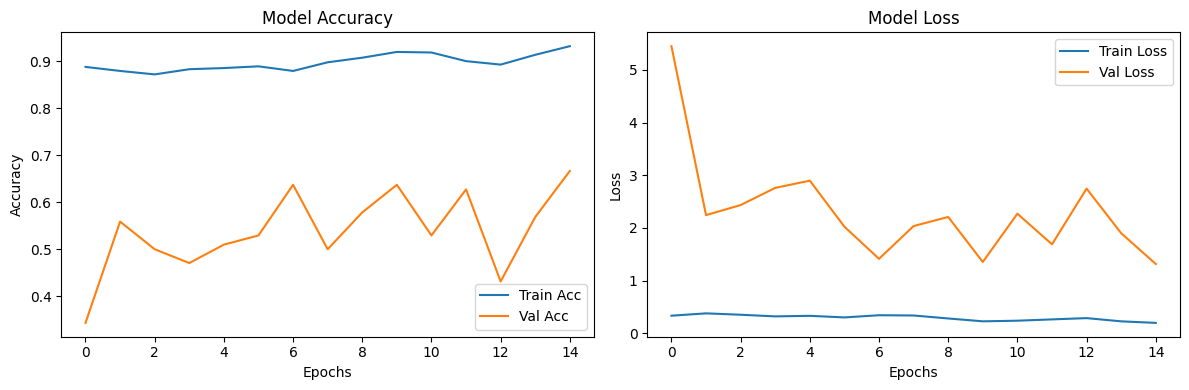

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Get model predictions (probabilities)
y_pred_prob = cnn_model.predict(test_generator)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Get true labels from test generator
y_true = test_generator.classes

# Print Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred))

# Print Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step
Accuracy: 61.76%
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       1.00      0.80      0.89        10
           2       0.62      0.80      0.70        10
           3       0.38      0.50      0.43        10
           4       0.50      0.90      0.64        10
           5       0.89      0.80      0.84        10
           6       0.90      0.90      0.90        10
           7       0.45      0.75      0.56        12
           8       0.75      0.30      0.43        10
           9       0.57      0.40      0.47        10

    accuracy                           0.62       102
   macro avg       0.61      0.61      0.59       102
weighted avg       0.60      0.62      0.59       102

Confusion Matrix:
 [[0 0 1 3 1 1 1 2 1 0]
 [0 8 1 0 0 0 0 0 0 1]
 [0 0 8 0 0 0 0 1 0 1]
 [0 0 0 5 3 0 0 2 0 0]
 [0 0 0 0 9 0 0 1 0 0]
 [0 0 1 0 0 8 0 1 0 0]
 [0 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


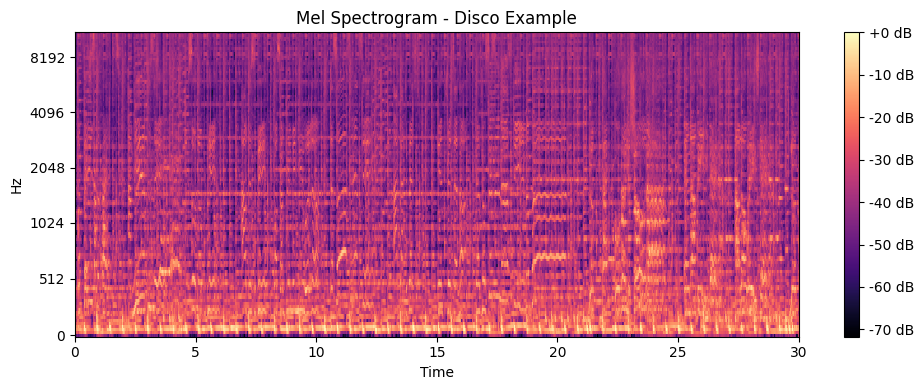

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/genres_original/disco/disco.00002.wav'
y, sr = librosa.load(file_path, sr=22050)

# Generate and plot a Mel-spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram - Disco Example')
plt.tight_layout()
plt.show()
